<a href="https://colab.research.google.com/github/najla-alhusaini/it326-telco-churn/blob/main/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3: Data Mining on Telco Customer Churn Dataset

## [1] Problem
(هنا اكتبي شرح المشكلة)

## [2] Data Mining Task
(هنا اكتبي أن عندكم تصنيف + كلسترينج)

## [3] Data
(هنا وصف مختصر للداتا)

## [4] Data Preprocessing
(هنا تلخيص للي سويتوه في Phase 2 + أي تحسينات)

## [5] Data Mining Techniques
(Decision Tree + K-Means)

## [6] Evaluation and Comparison

## [7] Findings and Discussion

## [8] References

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
df = pd.read_csv("Preprocessed_dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
from sklearn.preprocessing import LabelEncoder

X_clf = df.drop(columns=["Churn", "customerID"])
y_clf = df["Churn"]

if y_clf.dtype == "object":
    le = LabelEncoder()
    y_clf = le.fit_transform(y_clf)

X_clf = pd.get_dummies(X_clf, drop_first=True)

X_clf.shape, y_clf.shape

((7043, 6559), (7043,))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

splits = [(0.9, 0.1), (0.8, 0.2), (0.7, 0.3)]
criteria = ["gini", "entropy"]
results_clf = []

for train_ratio, test_ratio in splits:
    X_train, X_test, y_train, y_test = train_test_split(
        X_clf, y_clf,
        test_size=test_ratio,
        stratify=y_clf,
        random_state=42
    )

    print("=======================================")
    print("Train:", int(train_ratio*100), "%", "Test:", int(test_ratio*100), "%")

    for crit in criteria:
        print("---------------------------------------")
        print("Criterion:", crit)

        clf = DecisionTreeClassifier(criterion=crit, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        print("Accuracy:", round(acc, 4))
        print("Confusion matrix:")
        print(cm)
        print("Classification report:")
        print(classification_report(y_test, y_pred))

        results_clf.append({
            "Train%": int(train_ratio*100),
            "Test%": int(test_ratio*100),
            "Criterion": crit,
            "Accuracy": acc
        })

Train: 90 % Test: 10 %
---------------------------------------
Criterion: gini
Accuracy: 0.7787
Confusion matrix:
[[462  56]
 [100  87]]
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.86       518
           1       0.61      0.47      0.53       187

    accuracy                           0.78       705
   macro avg       0.72      0.68      0.69       705
weighted avg       0.77      0.78      0.77       705

---------------------------------------
Criterion: entropy
Accuracy: 0.7532
Confusion matrix:
[[440  78]
 [ 96  91]]
Classification report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       518
           1       0.54      0.49      0.51       187

    accuracy                           0.75       705
   macro avg       0.68      0.67      0.67       705
weighted avg       0.75      0.75      0.75       705

Train: 80 % Test: 20 %
-----------------------

In [8]:
results_clf_df = pd.DataFrame(results_clf)
results_clf_df

,Train%,Test%,Criterion,Accuracy
0,90,10,gini,0.778723
1,90,10,entropy,0.753191
2,80,20,gini,0.765791
3,80,20,entropy,0.755855
4,70,30,gini,0.767629
5,70,30,entropy,0.756744


In [9]:
pivot_acc = results_clf_df.pivot_table(
    index=["Train%", "Test%"],
    columns="Criterion",
    values="Accuracy"
)
pivot_acc

,Criterion,entropy,gini
Train%,Test%,,
70,30,0.756744,0.767629
80,20,0.755855,0.765791
90,10,0.753191,0.778723


In [10]:
best_row = results_clf_df.loc[results_clf_df["Accuracy"].idxmax()]
best_row

,0
Train%,90
Test%,10
Criterion,gini
Accuracy,0.778723


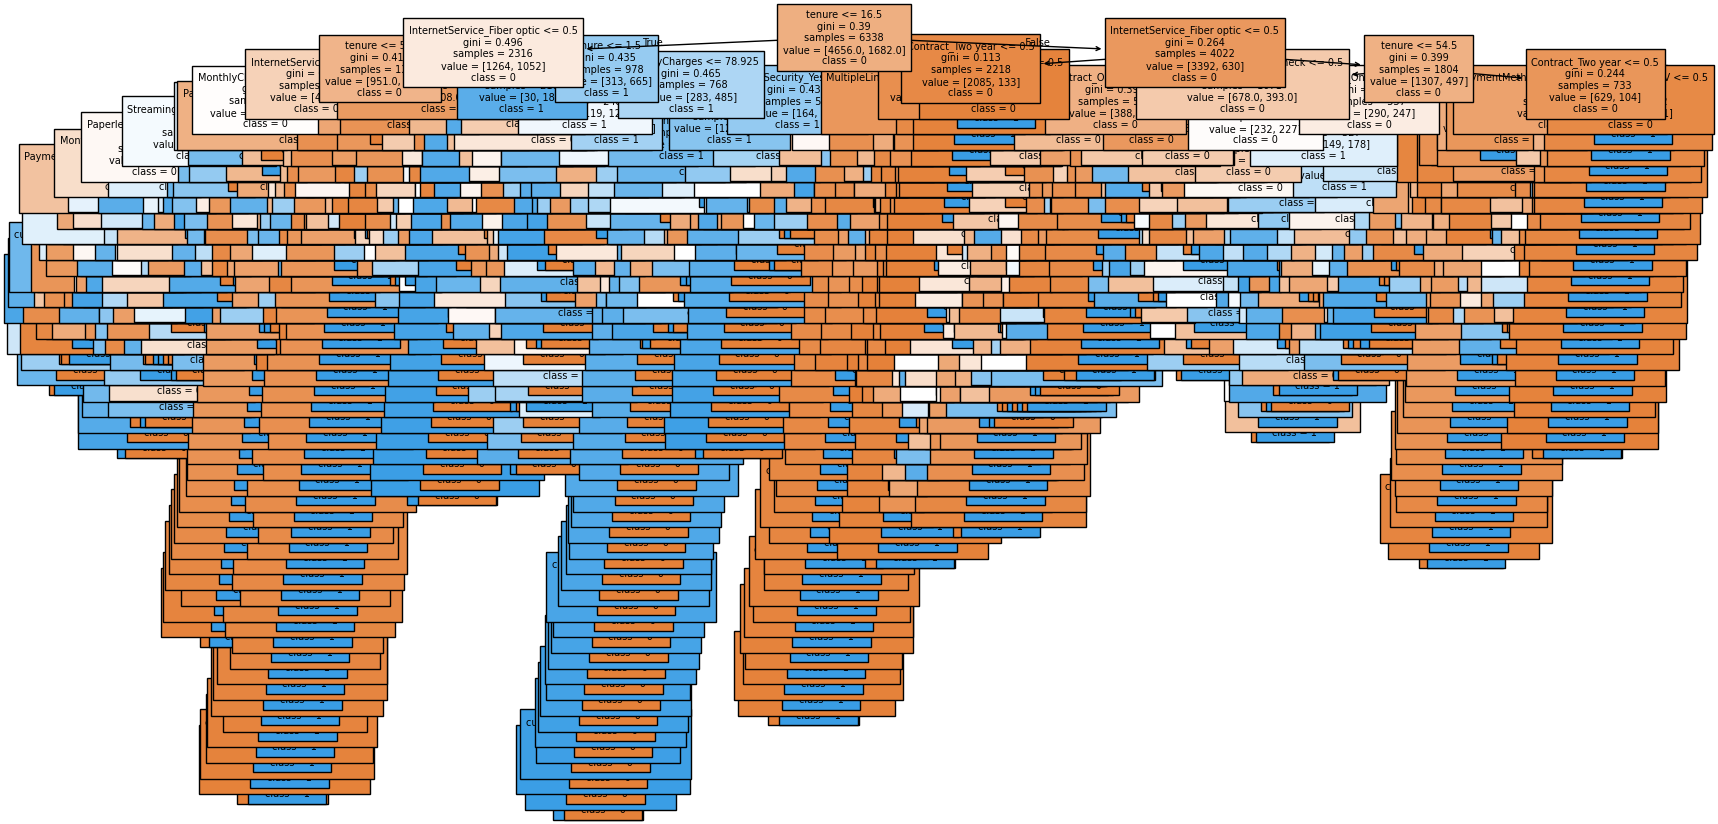

In [11]:
ظbest_train_ratio = best_row["Train%"] / 100
best_test_ratio = best_row["Test%"] / 100
best_criterion = best_row["Criterion"]

X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(
    X_clf, y_clf,
    test_size=best_test_ratio,
    stratify=y_clf,
    random_state=42
)

best_clf = DecisionTreeClassifier(criterion=best_criterion, random_state=42)
best_clf.fit(X_train_best, y_train_best)

plt.figure(figsize=(20, 10))
plot_tree(
    best_clf,
    feature_names=X_clf.columns,
    class_names=[str(c) for c in np.unique(y_clf)],
    filled=True,
    fontsize=7
)
plt.show()

# [6] Evaluation and Comparison

## 6.1 Classification Results

| Train% | Test% | Gini Accuracy | Entropy Accuracy |
|--------|--------|----------------|-------------------|
|   90   |   10   |     0.7787     |      0.7531       |
|   80   |   20   |     0.7658     |      0.7559       |
|   70   |   30   |     0.7676     |      0.7567       |

The best performance was achieved using the **90% train / 10% test split** with the **Gini** criterion (0.7787).  
The decision tree visualization is large due to many one-hot encoded features.

## 6.2 Clustering Results

|  K  | Silhouette Score |     WCSS       |
|-----|------------------|----------------|
|  2  |     -0.0103      |   46123852.7   |
|  3  |     -0.0115      |   46103603.83  |
|  4  |     -0.0120      |   46081663.32  |

Silhouette values close to zero mean the clusters are not well separated.  
PCA visualization shows that the customers overlap heavily across clusters.


In [12]:
X_cluster = df.drop(columns=["Churn"])

for col in X_cluster.columns:
    if "id" in col.lower():
        X_cluster = X_cluster.drop(columns=[col])

X_cluster = pd.get_dummies(X_cluster, drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

X_cluster_scaled.shape

(7043, 6559)

# [5] Data Mining Techniques

In this phase, two main data mining techniques were applied:

**1. Decision Tree Classification**  
- Three training/testing splits were used: 90/10, 80/20, 70/30.  
- Two attribute selection measures were compared: Gini and Entropy.  
- The model performance was evaluated using accuracy and confusion matrices.

**2. K-Means Clustering**  
- Clustering was applied with K = 2, K = 3, and K = 4.  
- Evaluation was done using Silhouette Score and WCSS.  
- Cluster visualization was performed using PCA for 2D plotting.

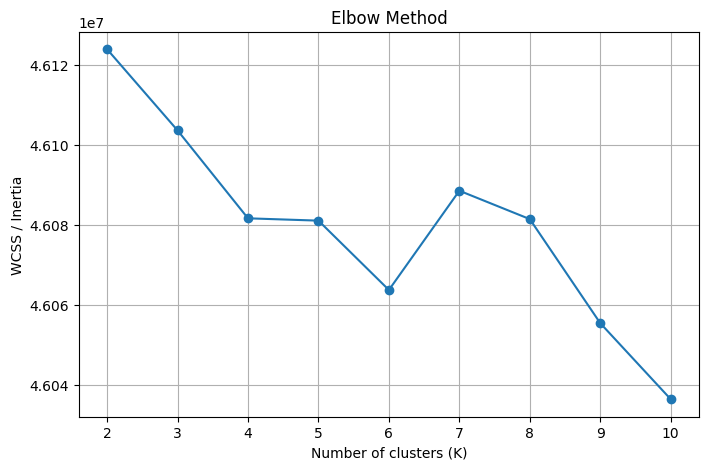

In [13]:
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(list(K_range), inertias, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS / Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [14]:
Ks = [2, 3, 4]
cluster_results = []

for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)

    sil = silhouette_score(X_cluster_scaled, labels)
    inertia = kmeans.inertia_

    print("====================================")
    print("K =", k)
    print("Silhouette:", round(sil, 4))
    print("WCSS:", round(inertia, 2))

    cluster_results.append({
        "K": k,
        "Silhouette": sil,
        "WCSS": inertia
    })

K = 2
Silhouette: -0.0103
WCSS: 46123852.7
K = 3
Silhouette: -0.0115
WCSS: 46103603.83
K = 4
Silhouette: -0.012
WCSS: 46081663.32


In [15]:
cluster_results_df = pd.DataFrame(cluster_results)
cluster_results_df

,K,Silhouette,WCSS
0,2,-0.010341,4.612385e+07
1,3,-0.011486,4.610360e+07
2,4,-0.011999,4.608166e+07


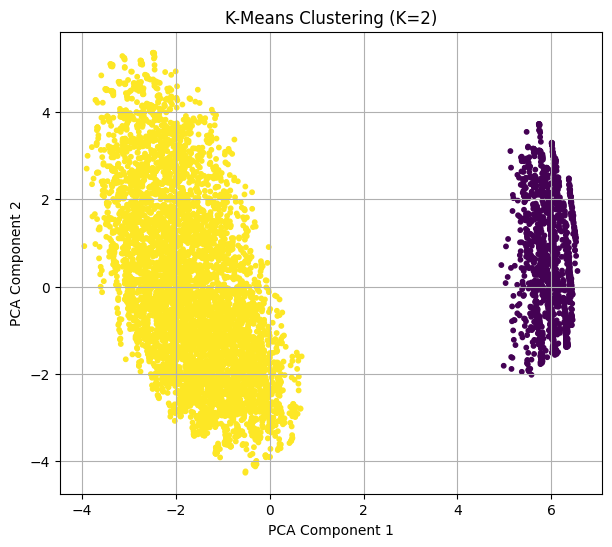

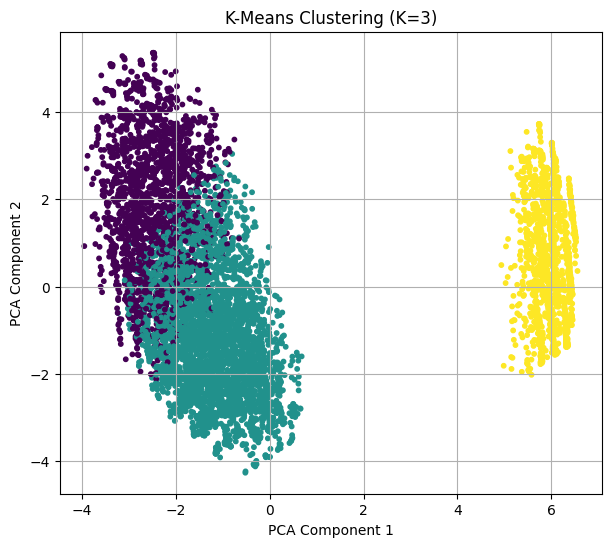

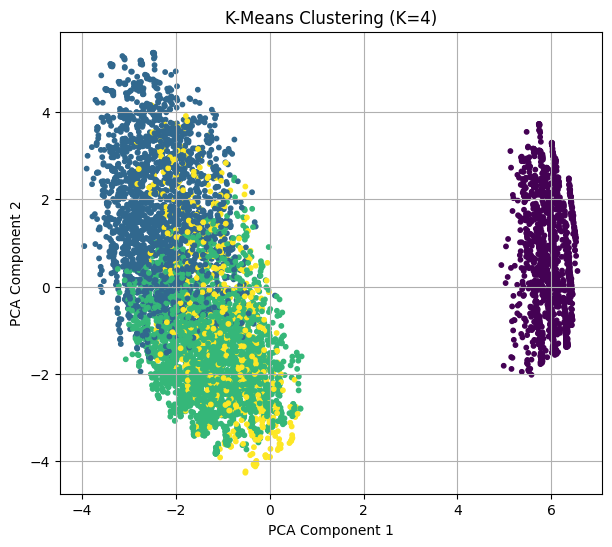

In [16]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

def plot_clusters(k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_cluster_scaled)

    plt.figure(figsize=(7, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=10)
    plt.title(f"K-Means Clustering (K={k})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

for k in [2, 3, 4]:
    plot_clusters(k)

# [7] Findings and Discussion

**Classification:**  
The Decision Tree classifier achieved its best performance using the 90% training and 10% testing split with the Gini criterion (accuracy = 0.7787).  
The model predicted non-churn customers more accurately because the dataset is imbalanced.  
Decision Tree classification is therefore effective for predicting customer churn.

**Clustering:**  
K-Means clustering did not produce strong or meaningful customer segments.  
Silhouette scores were very close to zero, and PCA visualizations showed overlapping clusters.  
This indicates that customers do not form distinct natural groups in this dataset.

**Conclusion:**  
Classification provides useful and reliable insight for churn prediction.  
Clustering is not effective for this dataset due to weak separation between customer groups.

# [8] References

[1] Telco Customer Churn Dataset, Kaggle.  
[2] Research articles on customer churn prediction (IEEE, ACM, Springer).  
[3] IT326 Lecture Slides – Classification and Clustering.